In [1]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import h5py
import pandas as pd

In [2]:
ds_file='CAMP2Ex-Hawk2DS10_Learjet_20190909_RA.ict'
fcdp_file='CAMP2Ex-HawkFCDP_Learjet_20190909_RA.ict'
nav_file='CAMP2Ex-Page0_Learjet_20190909_RA.ict.txt'
header_length = pd.read_csv(ds_file,nrows=0)
header_length = int(header_length.columns[0])
data1 = pd.read_csv(ds_file,skiprows=header_length-1)

header_length = pd.read_csv(fcdp_file,nrows=0)
header_length = int(header_length.columns[0])
data2 = pd.read_csv(fcdp_file,skiprows=header_length-1)

header_length = pd.read_csv(nav_file,nrows=0)
header_length = int(header_length.columns[0])
data3 = pd.read_csv(nav_file,skiprows=header_length-1)
data3.loc[:,'height']=data3['Palt']/3.28

In [83]:
data4 = pd.merge(
    data3,
    data1,
    on='Time_Start',
    how='inner')
dsdf = data4
dsdf.reset_index(drop=True, inplace=True)



In [84]:
data1.columns

Index(['Time_Start', 'sv', 'conc', 'ext', 'iwc', 'irregularCNT',
       'meanDiameter', 'meanVolDiam', 'effectiveDiam', 'cbin01',
       ...
       'nbin53', 'nbin54', 'nbin55', 'nbin56', 'nbin57', 'nbin58', 'nbin59',
       'nbin60', 'nbin61', 'totaln'],
      dtype='object', length=254)

In [85]:
data5 = pd.merge(
    data3,
    data2,
    on='Time_Start',
    how='inner')
dpdf = data5
dpdf.reset_index(drop=True, inplace=True)

In [86]:
dsdf

,Time_Start,TAS,Palt,Hdg,Temp,Dew,NevLWC,FSSPWC,FCDPHWC,FCDPWC,...,nbin53,nbin54,nbin55,nbin56,nbin57,nbin58,nbin59,nbin60,nbin61,totaln
0,3108,37,464,204,24.1,23.9,0.0,-999.0,0.2,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3109,42,479,203,24.0,24.2,0.0,-999.0,0.2,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3110,44,478,203,24.1,23.9,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3111,47,484,204,24.0,24.3,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3112,50,481,204,24.0,24.1,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,14324,158,18031,287,-11.6,-6.5,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0
11217,14325,158,18030,287,-11.6,-6.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0
11218,14326,158,18031,287,-11.6,-6.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0
11219,14327,158,18029,287,-11.5,-6.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0


In [6]:
dpdf.columns

Index(['Time_Start', 'TAS', 'Palt', 'Hdg', 'Temp', 'Dew', 'NevLWC', 'FSSPWC',
       'FCDPHWC', 'FCDPWC', 'NevTWC', 'Rice', 'VaV', 'FSSPConc', 'FCDPHConc',
       'FCDPConc', '2DSHsn10', '2DSVsn10', '2DSHNcar', '2DSVNcar', '2DS10Hawk',
       '2DS50Hawk', 'HVPS', 'CPI', 'Lat', 'Long', 'CPC', 'PCASP', 'height',
       'conc', 'ext', 'lwc', 'sv', 'CNT', 'cbin01', 'cbin02', 'cbin03',
       'cbin04', 'cbin05', 'cbin06', 'cbin07', 'cbin08', 'cbin09', 'cbin10',
       'cbin11', 'cbin12', 'cbin13', 'cbin14', 'cbin15', 'cbin16', 'cbin17',
       'cbin18', 'cbin19', 'cbin20', 'cbin21', 'nbin01', 'nbin02', 'nbin03',
       'nbin04', 'nbin05', 'nbin06', 'nbin07', 'nbin08', 'nbin09', 'nbin10',
       'nbin11', 'nbin12', 'nbin13', 'nbin14', 'nbin15', 'nbin16', 'nbin17',
       'nbin18', 'nbin19', 'nbin20', 'nbin21'],
      dtype='object')

In [87]:
dsdf = dsdf[dsdf['sv'] != -999]
dpdf = dpdf[dpdf['nbin01'] != -999]

In [88]:
dsdf

,Time_Start,TAS,Palt,Hdg,Temp,Dew,NevLWC,FSSPWC,FCDPHWC,FCDPWC,...,nbin53,nbin54,nbin55,nbin56,nbin57,nbin58,nbin59,nbin60,nbin61,totaln
0,3108,37,464,204,24.1,23.9,0.0,-999.0,0.2,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3109,42,479,203,24.0,24.2,0.0,-999.0,0.2,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3110,44,478,203,24.1,23.9,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3111,47,484,204,24.0,24.3,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3112,50,481,204,24.0,24.1,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,14324,158,18031,287,-11.6,-6.5,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0
11217,14325,158,18030,287,-11.6,-6.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0
11218,14326,158,18031,287,-11.6,-6.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0
11219,14327,158,18029,287,-11.5,-6.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0


In [89]:
a=dsdf.iloc[:,37:97].replace(-9.99,0.0)
b=dsdf.iloc[:,98:158].replace(-999,0.0)
c=dsdf.iloc[:,159:219].replace(-999,0.0)

In [90]:
c

,mbin01,mbin02,mbin03,mbin04,mbin05,mbin06,mbin07,mbin08,mbin09,mbin10,...,mbin51,mbin52,mbin53,mbin54,mbin55,mbin56,mbin57,mbin58,mbin59,mbin60
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,0.000014,0.000050,0.000075,0.000060,0.000082,0.000079,0.000084,0.000079,0.000076,0.000078,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11217,0.000019,0.000052,0.000057,0.000072,0.000107,0.000090,0.000071,0.000076,0.000048,0.000078,...,0.00015,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11218,0.000019,0.000058,0.000060,0.000076,0.000131,0.000079,0.000080,0.000098,0.000097,0.000091,...,0.00000,0.000149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11219,0.000022,0.000057,0.000062,0.000059,0.000109,0.000107,0.000079,0.000099,0.000082,0.000084,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
b=b*10

In [92]:
b

,abin01,abin02,abin03,abin04,abin05,abin06,abin07,abin08,abin09,abin10,...,abin51,abin52,abin53,abin54,abin55,abin56,abin57,abin58,abin59,abin60
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,0.02342,0.02892,0.03619,0.02437,0.02993,0.02622,0.02638,0.02347,0.02172,0.02099,...,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11217,0.03054,0.02953,0.02806,0.02932,0.03856,0.03019,0.02240,0.02241,0.01360,0.02077,...,0.0158,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11218,0.02966,0.03451,0.02918,0.03090,0.04715,0.02593,0.02525,0.02856,0.02700,0.02451,...,0.0000,0.01483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11219,0.03663,0.03320,0.02980,0.02483,0.03938,0.03590,0.02486,0.02952,0.02285,0.02334,...,0.0000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
h5=10*c.iloc[:,0]+10*c.iloc[:,1]+10*c.iloc[:,2]+10*c.iloc[:,3]+\
  10*c.iloc[:,4]+10*c.iloc[:,5]+10*c.iloc[:,6]+10*c.iloc[:,7]+\
  10*c.iloc[:,8]+10*c.iloc[:,9]+10*c.iloc[:,10]+10*c.iloc[:,11]+\
  10*c.iloc[:,12]+10*c.iloc[:,13]+10*c.iloc[:,14]+10*c.iloc[:,15]+\
  10*c.iloc[:,16]+10*c.iloc[:,17]+10*c.iloc[:,18]+10*c.iloc[:,19]+\
  20*c.iloc[:,20]+20*c.iloc[:,21]+20*c.iloc[:,22]+20*c.iloc[:,23]+\
  20*c.iloc[:,24]+20*c.iloc[:,25]+20*c.iloc[:,26]+20*c.iloc[:,27]+\
  20*c.iloc[:,28]+20*c.iloc[:,29]+20*c.iloc[:,30]+20*c.iloc[:,31]+\
  20*c.iloc[:,32]+20*c.iloc[:,33]+20*c.iloc[:,34]+50*c.iloc[:,35]+\
  50*c.iloc[:,36]+50*c.iloc[:,37]+50*c.iloc[:,38]+50*c.iloc[:,39]+\
  50*c.iloc[:,40]+50*c.iloc[:,41]+50*c.iloc[:,42]+50*c.iloc[:,43]+\
  50*c.iloc[:,44]+100*c.iloc[:,45]+100*c.iloc[:,46]+100*c.iloc[:,47]+100*c.iloc[:,48]+\
  100*c.iloc[:,49]+100*c.iloc[:,50]+100*c.iloc[:,51]+100*c.iloc[:,52]+\
  100*c.iloc[:,53]+100*c.iloc[:,54]+200*c.iloc[:,55]+200*c.iloc[:,56]+\
  200*c.iloc[:,57]+200*c.iloc[:,58]+200*c.iloc[:,59]

In [94]:
m5=10*b.iloc[:,0]+10*b.iloc[:,1]+10*b.iloc[:,2]+10*b.iloc[:,3]+\
  10*b.iloc[:,4]+10*b.iloc[:,5]+10*b.iloc[:,6]+10*b.iloc[:,7]+\
  10*b.iloc[:,8]+10*b.iloc[:,9]+10*b.iloc[:,10]+10*b.iloc[:,11]+\
  10*b.iloc[:,12]+10*b.iloc[:,13]+10*b.iloc[:,14]+10*b.iloc[:,15]+\
  10*b.iloc[:,16]+10*b.iloc[:,17]+10*b.iloc[:,18]+10*b.iloc[:,19]+\
  20*b.iloc[:,20]+20*b.iloc[:,21]+20*b.iloc[:,22]+20*b.iloc[:,23]+\
  20*b.iloc[:,24]+20*b.iloc[:,25]+20*b.iloc[:,26]+20*b.iloc[:,27]+\
  20*b.iloc[:,28]+20*b.iloc[:,29]+20*b.iloc[:,30]+20*b.iloc[:,31]+\
  20*b.iloc[:,32]+20*b.iloc[:,33]+20*b.iloc[:,34]+50*b.iloc[:,35]+\
  50*b.iloc[:,36]+50*b.iloc[:,37]+50*b.iloc[:,38]+50*b.iloc[:,39]+\
  50*b.iloc[:,40]+50*b.iloc[:,41]+50*b.iloc[:,42]+50*b.iloc[:,43]+\
  50*b.iloc[:,44]+100*b.iloc[:,45]+100*b.iloc[:,46]+100*b.iloc[:,47]+100*b.iloc[:,48]+\
  100*b.iloc[:,49]+100*b.iloc[:,50]+100*b.iloc[:,51]+100*b.iloc[:,52]+\
  100*b.iloc[:,53]+100*b.iloc[:,54]+200*b.iloc[:,55]+200*b.iloc[:,56]+\
  200*b.iloc[:,57]+200*b.iloc[:,58]+200*b.iloc[:,59]

In [95]:
e5=h5/m5
e5=e5*10**4

In [97]:
h2=10*a.iloc[:,0]*((10/2)**3)+10*a.iloc[:,1]*((20/2)**3)+10*a.iloc[:,2]*((30/2)**3)+10*a.iloc[:,3]*((40/2)**3)+\
  10*a.iloc[:,4]*((50/2)**3)+10*a.iloc[:,5]*((60/2)**3)+10*a.iloc[:,6]*((70/2)**3)+10*a.iloc[:,7]*((80/2)**3)+\
  10*a.iloc[:,8]*((90/2)**3)+10*a.iloc[:,9]*((100/2)**3)+10*a.iloc[:,10]*((110/2)**3)+10*a.iloc[:,11]*((120/2)**3)+\
  10*a.iloc[:,12]*((130/2)**3)+10*a.iloc[:,13]*((140/2)**3)+10*a.iloc[:,14]*((150/2)**3)+10*a.iloc[:,15]*((160/2)**3)+\
  10*a.iloc[:,16]*((170/2)**3)+10*a.iloc[:,17]*((180/2)**3)+10*a.iloc[:,18]*((190/2)**3)+10*a.iloc[:,19]*((200/2)**3)+\
  20*a.iloc[:,20]*((215/2)**3)+20*a.iloc[:,21]*((235/2)**3)+20*a.iloc[:,22]*((255/2)**3)+20*a.iloc[:,23]*((275/2)**3)+\
  20*a.iloc[:,24]*((295/2)**3)+20*a.iloc[:,25]*((315/2)**3)+20*a.iloc[:,26]*((335/2)**3)+20*a.iloc[:,27]*((355/2)**3)+\
  20*a.iloc[:,28]*((375/2)**3)+20*a.iloc[:,29]*((395/2)**3)+20*a.iloc[:,30]*((415/2)**3)+20*a.iloc[:,31]*((435/2)**3)+\
  20*a.iloc[:,32]*((455/2)**3)+20*a.iloc[:,33]*((475/2)**3)+20*a.iloc[:,34]*((495/2)**3)+50*a.iloc[:,35]*((530/2)**3)+\
  50*a.iloc[:,36]*((580/2)**3)+50*a.iloc[:,37]*((630/2)**3)+50*a.iloc[:,38]*((680/2)**3)+50*a.iloc[:,39]*((730/2)**3)+\
  50*a.iloc[:,40]*((780/2)**3)+50*a.iloc[:,41]*((830/2)**3)+50*a.iloc[:,42]*((880/2)**3)+50*a.iloc[:,43]*((930/2)**3)+\
  50*a.iloc[:,44]*((980/2)**3)+100*a.iloc[:,45]*((1055/2)**3)+100*a.iloc[:,46]*((1155/2)**3)+100*a.iloc[:,47]*((1255/2)**3)+100*a.iloc[:,48]*((1355/2)**3)+\
  100*a.iloc[:,49]*((1455/2)**3)+100*a.iloc[:,50]*((1555/2)**3)+100*a.iloc[:,51]*((1655/2)**3)+100*a.iloc[:,52]*((1755/2)**3)+\
  100*a.iloc[:,53]*((1855/2)**3)+100*a.iloc[:,54]*((1955/2)**3)+200*a.iloc[:,55]*((2055/2)**3)+200*a.iloc[:,56]*((2305/2)**3)+\
  200*a.iloc[:,57]*((2505/2)**3)+200*a.iloc[:,58]*((2705/2)**3)+200*a.iloc[:,59]*((2905/2)**3)

In [98]:
h3=10*a.iloc[:,0]*((10)**3)+10*a.iloc[:,1]*((20)**3)+10*a.iloc[:,2]*((30)**3)+10*a.iloc[:,3]*((40)**3)+\
  10*a.iloc[:,4]*((50)**3)+10*a.iloc[:,5]*((60)**3)+10*a.iloc[:,6]*((70)**3)+10*a.iloc[:,7]*((80)**3)+\
  10*a.iloc[:,8]*((90)**3)+10*a.iloc[:,9]*((100)**3)+10*a.iloc[:,10]*((110)**3)+10*a.iloc[:,11]*((120)**3)+\
  10*a.iloc[:,12]*((130)**3)+10*a.iloc[:,13]*((140)**3)+10*a.iloc[:,14]*((150)**3)+10*a.iloc[:,15]*((160)**3)+\
  10*a.iloc[:,16]*((170)**3)+10*a.iloc[:,17]*((180)**3)+10*a.iloc[:,18]*((190)**3)+10*a.iloc[:,19]*((200)**3)+\
  20*a.iloc[:,20]*((215)**3)+20*a.iloc[:,21]*((235)**3)+20*a.iloc[:,22]*((255)**3)+20*a.iloc[:,23]*((275)**3)+\
  20*a.iloc[:,24]*((295)**3)+20*a.iloc[:,25]*((315)**3)+20*a.iloc[:,26]*((335)**3)+20*a.iloc[:,27]*((355)**3)+\
  20*a.iloc[:,28]*((375)**3)+20*a.iloc[:,29]*((395)**3)+20*a.iloc[:,30]*((415)**3)+20*a.iloc[:,31]*((435)**3)+\
  20*a.iloc[:,32]*((455)**3)+20*a.iloc[:,33]*((475)**3)+20*a.iloc[:,34]*((495)**3)+50*a.iloc[:,35]*((530)**3)+\
  50*a.iloc[:,36]*((580)**3)+50*a.iloc[:,37]*((630)**3)+50*a.iloc[:,38]*((680)**3)+50*a.iloc[:,39]*((730)**3)+\
  50*a.iloc[:,40]*((780)**3)+50*a.iloc[:,41]*((830)**3)+50*a.iloc[:,42]*((880)**3)+50*a.iloc[:,43]*((930)**3)+\
  50*a.iloc[:,44]*((980)**3)+100*a.iloc[:,45]*((1055)**3)+100*a.iloc[:,46]*((1155)**3)+100*a.iloc[:,47]*((1255)**3)+100*a.iloc[:,48]*((1355)**3)+\
  100*a.iloc[:,49]*((1455)**3)+100*a.iloc[:,50]*((1555)**3)+100*a.iloc[:,51]*((1655)**3)+100*a.iloc[:,52]*((1755)**3)+\
  100*a.iloc[:,53]*((1855)**3)+100*a.iloc[:,54]*((1955)**3)+200*a.iloc[:,55]*((2055)**3)+200*a.iloc[:,56]*((2305)**3)+\
  200*a.iloc[:,57]*((2505)**3)+200*a.iloc[:,58]*((2705)**3)+200*a.iloc[:,59]*((2905)**3)

In [99]:
h4=5*a.iloc[:,0]*((10/2)**3)+5*a.iloc[:,1]*((20/2)**3)+5*a.iloc[:,2]*((30/2)**3)+5*a.iloc[:,3]*((40/2)**3)+\
  5*a.iloc[:,4]*((50/2)**3)+5*a.iloc[:,5]*((60/2)**3)+5*a.iloc[:,6]*((70/2)**3)+5*a.iloc[:,7]*((80/2)**3)+\
  5*a.iloc[:,8]*((90/2)**3)+5*a.iloc[:,9]*((100/2)**3)+5*a.iloc[:,10]*((110/2)**3)+5*a.iloc[:,11]*((120/2)**3)+\
  5*a.iloc[:,12]*((130/2)**3)+5*a.iloc[:,13]*((140/2)**3)+5*a.iloc[:,14]*((150/2)**3)+5*a.iloc[:,15]*((160/2)**3)+\
  5*a.iloc[:,16]*((170/2)**3)+5*a.iloc[:,17]*((180/2)**3)+5*a.iloc[:,18]*((190/2)**3)+5*a.iloc[:,19]*((200/2)**3)+\
  10*a.iloc[:,20]*((215/2)**3)+10*a.iloc[:,21]*((235/2)**3)+10*a.iloc[:,22]*((255/2)**3)+10*a.iloc[:,23]*((275/2)**3)+\
  10*a.iloc[:,24]*((295/2)**3)+10*a.iloc[:,25]*((315/2)**3)+10*a.iloc[:,26]*((335/2)**3)+10*a.iloc[:,27]*((355/2)**3)+\
  10*a.iloc[:,28]*((375/2)**3)+10*a.iloc[:,29]*((395/2)**3)+10*a.iloc[:,30]*((415/2)**3)+10*a.iloc[:,31]*((435/2)**3)+\
  10*a.iloc[:,32]*((455/2)**3)+10*a.iloc[:,33]*((475/2)**3)+10*a.iloc[:,34]*((495/2)**3)+25*a.iloc[:,35]*((530/2)**3)+\
  25*a.iloc[:,36]*((580/2)**3)+25*a.iloc[:,37]*((630/2)**3)+25*a.iloc[:,38]*((680/2)**3)+25*a.iloc[:,39]*((730/2)**3)+\
  25*a.iloc[:,40]*((780/2)**3)+25*a.iloc[:,41]*((830/2)**3)+25*a.iloc[:,42]*((880/2)**3)+25*a.iloc[:,43]*((930/2)**3)+\
  25*a.iloc[:,44]*((980/2)**3)+50*a.iloc[:,45]*((1055/2)**3)+50*a.iloc[:,46]*((1155/2)**3)+50*a.iloc[:,47]*((1255/2)**3)+50*a.iloc[:,48]*((1355/2)**3)+\
  50*a.iloc[:,49]*((1455/2)**3)+50*a.iloc[:,50]*((1555/2)**3)+50*a.iloc[:,51]*((1655/2)**3)+50*a.iloc[:,52]*((1755/2)**3)+\
  50*a.iloc[:,53]*((1855/2)**3)+50*a.iloc[:,54]*((1955/2)**3)+100*a.iloc[:,55]*((2055/2)**3)+100*a.iloc[:,56]*((2305/2)**3)+\
  100*a.iloc[:,57]*((2505/2)**3)+100*a.iloc[:,58]*((2705/2)**3)+100*a.iloc[:,59]*((2905/2)**3)

In [100]:
m2=10*a.iloc[:,0]*((10/2)**2)+10*a.iloc[:,1]*((20/2)**2)+10*a.iloc[:,2]*((30/2)**2)+10*a.iloc[:,3]*((40/2)**2)+\
  10*a.iloc[:,4]*((50/2)**2)+10*a.iloc[:,5]*((60/2)**2)+10*a.iloc[:,6]*((70/2)**2)+10*a.iloc[:,7]*((80/2)**2)+\
  10*a.iloc[:,8]*((90/2)**2)+10*a.iloc[:,9]*((100/2)**2)+10*a.iloc[:,10]*((110/2)**2)+10*a.iloc[:,11]*((120/2)**2)+\
  10*a.iloc[:,12]*((130/2)**2)+10*a.iloc[:,13]*((140/2)**2)+10*a.iloc[:,14]*((150/2)**2)+10*a.iloc[:,15]*((160/2)**2)+\
  10*a.iloc[:,16]*((170/2)**2)+10*a.iloc[:,17]*((180/2)**2)+10*a.iloc[:,18]*((190/2)**2)+10*a.iloc[:,19]*((200/2)**2)+\
  20*a.iloc[:,20]*((215/2)**2)+20*a.iloc[:,21]*((235/2)**2)+20*a.iloc[:,22]*((255/2)**2)+20*a.iloc[:,23]*((275/2)**2)+\
  20*a.iloc[:,24]*((295/2)**2)+20*a.iloc[:,25]*((315/2)**2)+20*a.iloc[:,26]*((335/2)**2)+20*a.iloc[:,27]*((355/2)**2)+\
  20*a.iloc[:,28]*((375/2)**2)+20*a.iloc[:,29]*((395/2)**2)+20*a.iloc[:,30]*((415/2)**2)+20*a.iloc[:,31]*((435/2)**2)+\
  20*a.iloc[:,32]*((455/2)**2)+20*a.iloc[:,33]*((475/2)**2)+20*a.iloc[:,34]*((495/2)**2)+50*a.iloc[:,35]*((530/2)**2)+\
  50*a.iloc[:,36]*((580/2)**2)+50*a.iloc[:,37]*((630/2)**2)+50*a.iloc[:,38]*((680/2)**2)+50*a.iloc[:,39]*((730/2)**2)+\
  50*a.iloc[:,40]*((780/2)**2)+50*a.iloc[:,41]*((830/2)**2)+50*a.iloc[:,42]*((880/2)**2)+50*a.iloc[:,43]*((930/2)**2)+\
  50*a.iloc[:,44]*((980/2)**2)+100*a.iloc[:,45]*((1055/2)**2)+100*a.iloc[:,46]*((1155/2)**2)+100*a.iloc[:,47]*((1255/2)**2)+100*a.iloc[:,48]*((1355/2)**2)+\
  100*a.iloc[:,49]*((1455/2)**2)+100*a.iloc[:,50]*((1555/2)**2)+100*a.iloc[:,51]*((1655/2)**2)+100*a.iloc[:,52]*((1755/2)**2)+\
  100*a.iloc[:,53]*((1855/2)**2)+100*a.iloc[:,54]*((1955/2)**2)+200*a.iloc[:,55]*((2055/2)**2)+200*a.iloc[:,56]*((2305/2)**2)+\
  200*a.iloc[:,57]*((2505/2)**2)+200*a.iloc[:,58]*((2705/2)**2)+200*a.iloc[:,59]*((2905/2)**2)

In [101]:
m3=10*a.iloc[:,0]*((10)**2)+10*a.iloc[:,1]*((20)**2)+10*a.iloc[:,2]*((30)**2)+10*a.iloc[:,3]*((40)**2)+\
  10*a.iloc[:,4]*((50)**2)+10*a.iloc[:,5]*((60)**2)+10*a.iloc[:,6]*((70)**2)+10*a.iloc[:,7]*((80)**2)+\
  10*a.iloc[:,8]*((90)**2)+10*a.iloc[:,9]*((100)**2)+10*a.iloc[:,10]*((110)**2)+10*a.iloc[:,11]*((120)**2)+\
  10*a.iloc[:,12]*((130)**2)+10*a.iloc[:,13]*((140)**2)+10*a.iloc[:,14]*((150)**2)+10*a.iloc[:,15]*((160)**2)+\
  10*a.iloc[:,16]*((170)**2)+10*a.iloc[:,17]*((180)**2)+10*a.iloc[:,18]*((190)**2)+10*a.iloc[:,19]*((200)**2)+\
  20*a.iloc[:,20]*((215)**2)+20*a.iloc[:,21]*((235)**2)+20*a.iloc[:,22]*((255)**2)+20*a.iloc[:,23]*((275)**2)+\
  20*a.iloc[:,24]*((295)**2)+20*a.iloc[:,25]*((315)**2)+20*a.iloc[:,26]*((335)**2)+20*a.iloc[:,27]*((355)**2)+\
  20*a.iloc[:,28]*((375)**2)+20*a.iloc[:,29]*((395)**2)+20*a.iloc[:,30]*((415)**2)+20*a.iloc[:,31]*((435)**2)+\
  20*a.iloc[:,32]*((455)**2)+20*a.iloc[:,33]*((475)**2)+20*a.iloc[:,34]*((495)**2)+50*a.iloc[:,35]*((530)**2)+\
  50*a.iloc[:,36]*((580)**2)+50*a.iloc[:,37]*((630)**2)+50*a.iloc[:,38]*((680)**2)+50*a.iloc[:,39]*((730)**2)+\
  50*a.iloc[:,40]*((780)**2)+50*a.iloc[:,41]*((830)**2)+50*a.iloc[:,42]*((880)**2)+50*a.iloc[:,43]*((930)**2)+\
  50*a.iloc[:,44]*((980)**2)+100*a.iloc[:,45]*((1055)**2)+100*a.iloc[:,46]*((1155)**2)+100*a.iloc[:,47]*((1255)**2)+100*a.iloc[:,48]*((1355)**2)+\
  100*a.iloc[:,49]*((1455)**2)+100*a.iloc[:,50]*((1555)**2)+100*a.iloc[:,51]*((1655)**2)+100*a.iloc[:,52]*((1755)**2)+\
  100*a.iloc[:,53]*((1855)**2)+100*a.iloc[:,54]*((1955)**2)+200*a.iloc[:,55]*((2055)**2)+200*a.iloc[:,56]*((2305)**2)+\
  200*a.iloc[:,57]*((2505)**2)+200*a.iloc[:,58]*((2705)**2)+200*a.iloc[:,59]*((2905)**2)

In [102]:
m4=5*a.iloc[:,0]*((10/2)**2)+5*a.iloc[:,1]*((20/2)**2)+5*a.iloc[:,2]*((30/2)**2)+5*a.iloc[:,3]*((40/2)**2)+\
  5*a.iloc[:,4]*((50/2)**2)+5*a.iloc[:,5]*((60/2)**2)+5*a.iloc[:,6]*((70/2)**2)+5*a.iloc[:,7]*((80/2)**2)+\
  5*a.iloc[:,8]*((90/2)**2)+5*a.iloc[:,9]*((100/2)**2)+5*a.iloc[:,10]*((110/2)**2)+5*a.iloc[:,11]*((120/2)**2)+\
  5*a.iloc[:,12]*((130/2)**2)+5*a.iloc[:,13]*((140/2)**2)+5*a.iloc[:,14]*((150/2)**2)+5*a.iloc[:,15]*((160/2)**2)+\
  5*a.iloc[:,16]*((170/2)**2)+5*a.iloc[:,17]*((180/2)**2)+5*a.iloc[:,18]*((190/2)**2)+5*a.iloc[:,19]*((200/2)**2)+\
  10*a.iloc[:,20]*((215/2)**2)+10*a.iloc[:,21]*((235/2)**2)+10*a.iloc[:,22]*((255/2)**2)+10*a.iloc[:,23]*((275/2)**2)+\
  10*a.iloc[:,24]*((295/2)**2)+10*a.iloc[:,25]*((315/2)**2)+10*a.iloc[:,26]*((335/2)**2)+10*a.iloc[:,27]*((355/2)**2)+\
  10*a.iloc[:,28]*((375/2)**2)+10*a.iloc[:,29]*((395/2)**2)+10*a.iloc[:,30]*((415/2)**2)+10*a.iloc[:,31]*((435/2)**2)+\
  10*a.iloc[:,32]*((455/2)**2)+10*a.iloc[:,33]*((475/2)**2)+10*a.iloc[:,34]*((495/2)**2)+25*a.iloc[:,35]*((530/2)**2)+\
  25*a.iloc[:,36]*((580/2)**2)+25*a.iloc[:,37]*((630/2)**2)+25*a.iloc[:,38]*((680/2)**2)+25*a.iloc[:,39]*((730/2)**2)+\
  25*a.iloc[:,40]*((780/2)**2)+25*a.iloc[:,41]*((830/2)**2)+25*a.iloc[:,42]*((880/2)**2)+25*a.iloc[:,43]*((930/2)**2)+\
  25*a.iloc[:,44]*((980/2)**2)+50*a.iloc[:,45]*((1055/2)**2)+50*a.iloc[:,46]*((1155/2)**2)+50*a.iloc[:,47]*((1255/2)**2)+50*a.iloc[:,48]*((1355/2)**2)+\
  50*a.iloc[:,49]*((1455/2)**2)+50*a.iloc[:,50]*((1555/2)**2)+50*a.iloc[:,51]*((1655/2)**2)+50*a.iloc[:,52]*((1755/2)**2)+\
  50*a.iloc[:,53]*((1855/2)**2)+50*a.iloc[:,54]*((1955/2)**2)+100*a.iloc[:,55]*((2055/2)**2)+100*a.iloc[:,56]*((2305/2)**2)+\
  100*a.iloc[:,57]*((2505/2)**2)+100*a.iloc[:,58]*((2705/2)**2)+100*a.iloc[:,59]*((2905/2)**2)

In [103]:
e2=h2/m2

In [104]:
e3=h3/m3

In [105]:
e4=h4/m4

In [23]:
e4

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
11216    312.280465
11217    330.744530
11218    363.898669
11219    326.761497
11220    371.727188
Length: 10724, dtype: float64

In [24]:
e2.max()

890.656310592672

In [25]:
e4.max()

890.656310592672

In [26]:
e3.max()

1781.312621185344

In [106]:
dsdf.loc[:,'Re1']= e2.values
dsdf.loc[:,'Re2']= e3.values
dsdf.loc[:,'Re3']= e4.values
dsdf.loc[:,'Re5']= e5.values

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [107]:
#fcdp=dpdf[dpdf['conc']>10000]

twods=dsdf[dsdf['conc']>10000]
#fcdp=dpdf
twods=dsdf

In [108]:
twods

,Time_Start,TAS,Palt,Hdg,Temp,Dew,NevLWC,FSSPWC,FCDPHWC,FCDPWC,...,nbin57,nbin58,nbin59,nbin60,nbin61,totaln,Re1,Re2,Re3,Re5
0,3108,37,464,204,24.1,23.9,0.0,-999.0,0.2,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,3109,42,479,203,24.0,24.2,0.0,-999.0,0.2,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3110,44,478,203,24.1,23.9,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,3111,47,484,204,24.0,24.3,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,3112,50,481,204,24.0,24.1,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,14324,158,18031,287,-11.6,-6.5,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1400.0,312.280465,624.560929,312.280465,71.660053
11217,14325,158,18030,287,-11.6,-6.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1400.0,330.744530,661.489060,330.744530,70.839271
11218,14326,158,18031,287,-11.6,-6.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1400.0,363.898669,727.797338,363.898669,73.269412
11219,14327,158,18029,287,-11.5,-6.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1400.0,326.761497,653.522994,326.761497,71.091299


In [109]:
twods.effectiveDiam

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
11216    107.5
11217    106.2
11218    109.8
11219    106.6
11220    112.9
Name: effectiveDiam, Length: 10724, dtype: float64

In [110]:
#fcdp['Time_Start']=(fcdp['Time_Start'])/3600
twods['Time_Start']=(twods['Time_Start'])/3600

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
twods

,Time_Start,TAS,Palt,Hdg,Temp,Dew,NevLWC,FSSPWC,FCDPHWC,FCDPWC,...,nbin57,nbin58,nbin59,nbin60,nbin61,totaln,Re1,Re2,Re3,Re5
0,0.000240,37,464,204,24.1,23.9,0.0,-999.0,0.2,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,0.000240,42,479,203,24.0,24.2,0.0,-999.0,0.2,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.000240,44,478,203,24.1,23.9,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,0.000240,47,484,204,24.0,24.3,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,0.000240,50,481,204,24.0,24.1,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,0.001105,158,18031,287,-11.6,-6.5,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1400.0,312.280465,624.560929,312.280465,71.660053
11217,0.001105,158,18030,287,-11.6,-6.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1400.0,330.744530,661.489060,330.744530,70.839271
11218,0.001105,158,18031,287,-11.6,-6.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1400.0,363.898669,727.797338,363.898669,73.269412
11219,0.001105,158,18029,287,-11.5,-6.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1400.0,326.761497,653.522994,326.761497,71.091299


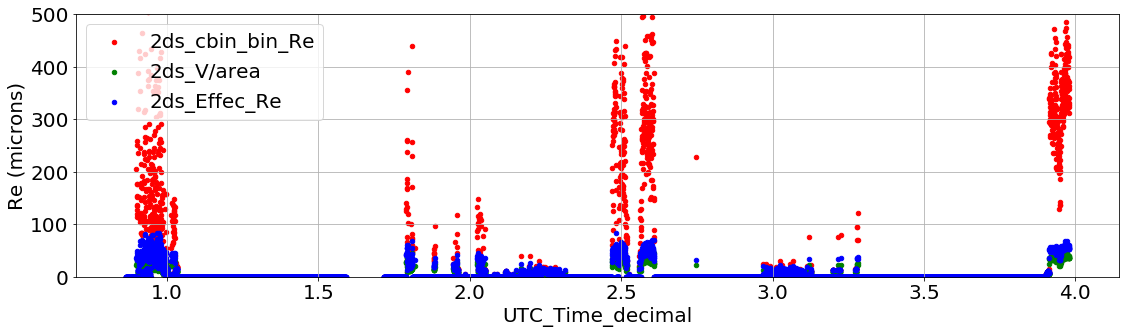

In [112]:
#plt.xlim(18.75,18.9)
plt.figure(figsize=(16,5))
cm = plt.cm.get_cmap('jet')
#cm = plt.cm.get_cmap('jet')
#xy = range(20)
#z = xy
plt.scatter(twods['Time_Start'].values, twods['Re1'].values, label='2ds_cbin_bin_Re',s=20,color='red')
#plt.scatter(twods['Time_Start'].values, (twods['Re2'].values)/2, label='2ds_cbin_De/2',s=20,color='orange')
#plt.scatter(twods['Time_Start'].values, twods['Re3'].values, label='2ds_cbin_bin/2_Re',s=20,color='green')
plt.scatter(twods['Time_Start'].values, (twods['Re5'].values)/2, label='2ds_V/area',s=20,color='green')
plt.scatter(twods['Time_Start'].values, twods.effectiveDiam/2, label='2ds_Effec_Re',s=20,color='blue')
#plt.scatter(fcdp['Time_Start'].values, fcdp['Re'].values, label='fcdp_cbin_Re',s=20,color='green')
#cb = plt.colorbar()
#plt.clim(0, 7000)
#plt.scatter(gpstime_res,bo_re_res,label='Pol-',s=12)
#plt.plot(glat_21[cond],bi_re21[cond])
#plt.plot(glat_21[cond],bo_re[cond])
plt.legend(loc=0)
plt.grid(True)
#plt.xlim(3.25,3.3)
plt.ylim(0,500)
plt.xlabel('UTC_Time_decimal')
plt.ylabel('Re (microns)')
plt.rcParams.update({'font.size': 20})

plt.tight_layout(True)

plt.show()

#cmap = plt.get_cmap('jet', 20)
#cmap.set_under('white')

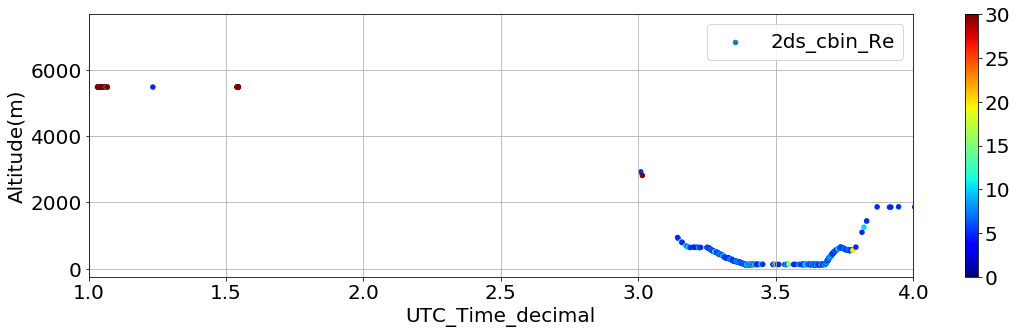

In [571]:
#plt.xlim(18.75,18.9)
plt.figure(figsize=(16,5))
cm = plt.cm.get_cmap('jet')
#cm = plt.cm.get_cmap('jet')
#xy = range(20)
#z = xy
#plt.scatter(twods['Time_Start'].values, twods['Re'].values, label='2ds_cbin_Re',s=20,color='red')
#plt.scatter(twods['Time_Start'].values, twods.effectiveDiam/2, label='2ds_Effec_Re',s=20,color='blue')
#plt.scatter(fcdp['Time_Start'].values, fcdp['height'].values, c=fcdp['Re'].values, label='fcdp_cbin_Re',s=20,cmap=cm)
plt.scatter(twods['Time_Start'].values, twods['height'].values, c=twods['Re'].values, label='2ds_cbin_Re',s=20,cmap=cm)
cb = plt.colorbar()
plt.clim(0, 30)
#plt.scatter(gpstime_res,bo_re_res,label='Pol-',s=12)
#plt.plot(glat_21[cond],bi_re21[cond])
#plt.plot(glat_21[cond],bo_re[cond])
plt.legend(loc=0)
plt.grid(True)
plt.xlim(1,4)
#plt.ylim(0,100)
plt.xlabel('UTC_Time_decimal')
plt.ylabel('Altitude(m)')
plt.rcParams.update({'font.size': 20})

plt.tight_layout(True)

plt.show()

#cmap = plt.get_cmap('jet', 20)
#cmap.set_under('white')

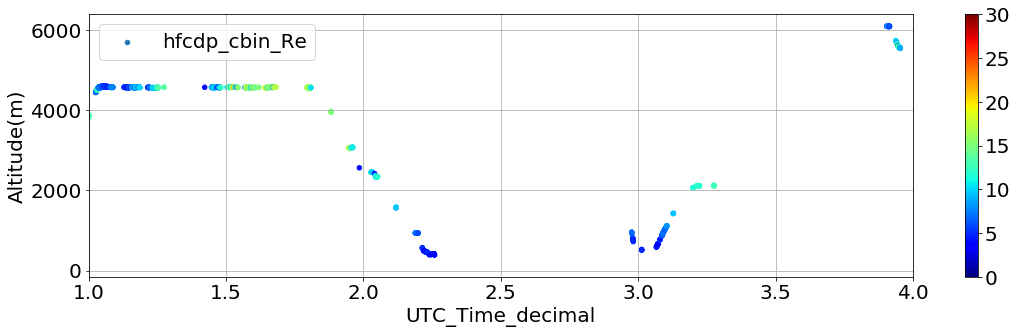

In [120]:
#plt.xlim(18.75,18.9)
plt.figure(figsize=(16,5))
cm = plt.cm.get_cmap('jet')
#cm = plt.cm.get_cmap('jet')
#xy = range(20)
#z = xy
#plt.scatter(twods['Time_Start'].values, twods['Re'].values, label='2ds_cbin_Re',s=20,color='red')
#plt.scatter(twods['Time_Start'].values, twods.effectiveDiam/2, label='2ds_Effec_Re',s=20,color='blue')
plt.scatter(fcdp['Time_Start'].values, fcdp['height'].values, c=fcdp['Re'].values, label='hfcdp_cbin_Re',s=20,cmap=cm)
#plt.scatter(twods['Time_Start'].values, twods['height'].values, c=twods['Re'].values, label='2ds_cbin_Re',s=20,cmap=cm)
cb = plt.colorbar()
plt.clim(0, 30)
#plt.scatter(gpstime_res,bo_re_res,label='Pol-',s=12)
#plt.plot(glat_21[cond],bi_re21[cond])
#plt.plot(glat_21[cond],bo_re[cond])
plt.legend(loc=0)
plt.grid(True)
plt.xlim(1,4)
#plt.ylim(0,100)
plt.xlabel('UTC_Time_decimal')
plt.ylabel('Altitude(m)')
plt.rcParams.update({'font.size': 20})

plt.tight_layout(True)

plt.show()

#cmap = plt.get_cmap('jet', 20)
#cmap.set_under('white')

In [113]:
twods=twods[twods.effectiveDiam>0]

In [114]:
twods=twods[twods.irregularCNT==0.0]

In [116]:
#c=fcdp[(fcdp['Time_Start']>1.8)&(fcdp['Time_Start']<2.3)]
d=twods[(twods['Time_Start']>1.8)&(twods['Time_Start']<2.3)]

In [117]:
d

,Time_Start,TAS,Palt,Hdg,Temp,Dew,NevLWC,FSSPWC,FCDPHWC,FCDPWC,...,nbin57,nbin58,nbin59,nbin60,nbin61,totaln,Re1,Re2,Re3,Re5
3373,1.800278,132,14999,78,1.8,2.2,0.1,0.0,2.1,0.2,...,0.0,0.0,0.0,0.0,0.0,110000.0,21.739042,43.478083,21.739042,22.183314
3374,1.800556,133,14979,79,2.2,1.7,1.5,1.0,3.1,1.6,...,0.0,0.0,0.0,0.0,0.0,120000.0,24.721863,49.443725,24.721863,22.978536
3375,1.800833,134,14971,79,2.6,1.6,1.5,1.3,2.7,1.7,...,0.0,0.0,0.0,0.0,0.0,110000.0,25.563458,51.126917,25.563458,23.332435
3376,1.801111,134,14964,80,2.7,2.5,1.5,1.2,2.6,1.5,...,0.0,0.0,0.0,0.0,0.0,100000.0,26.741685,53.483369,26.741685,23.568575
3377,1.801389,134,14953,79,2.7,3.3,1.5,1.1,2.0,1.6,...,0.0,0.0,0.0,0.0,0.0,41000.0,43.547317,87.094635,43.547317,27.390776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,2.295278,117,1082,180,26.0,25.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.000000,10.000000,5.000000,6.113241
5156,2.295556,117,1082,180,26.0,25.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.000000,10.000000,5.000000,6.113241
5165,2.298056,117,1088,181,26.1,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.000000,10.000000,5.000000,6.113241
5168,2.298889,117,1088,181,26.1,23.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,6.666953,13.333907,6.666953,8.972708


In [263]:
f = pd.merge(
    c,
    d,
    on='Time_Start',
    how='inner')
f.reset_index(drop=True, inplace=True)

In [264]:
f

,Time_Start,TAS_x,Palt_x,Hdg_x,Temp_x,Dew_x,NevLWC_x,FSSPWC_x,FCDPHWC_x,FCDPWC_x,...,nbin56,nbin57,nbin58,nbin59,nbin60,nbin61,totaln,Re2,Re4,Re_y
0,1.800278,132,14999,78,1.8,2.2,0.1,0.0,2.1,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,110000.0,43.478083,21.739042,21.739042
1,1.800556,133,14979,79,2.2,1.7,1.5,1.0,3.1,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,120000.0,49.443725,24.721863,24.721863
2,1.800833,134,14971,79,2.6,1.6,1.5,1.3,2.7,1.7,...,0.0,0.0,0.0,0.0,0.0,0.0,110000.0,51.126917,25.563458,25.563458
3,1.801111,134,14964,80,2.7,2.5,1.5,1.2,2.6,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,53.483369,26.741685,26.741685
4,1.801389,134,14953,79,2.7,3.3,1.5,1.1,2.0,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,41000.0,87.094635,43.547317,43.547317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2.257500,113,1358,38,25.0,25.1,0.0,0.1,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,66.0,16.917816,8.458908,8.458908
186,2.257778,113,1344,38,25.0,24.8,0.0,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,17.484624,8.742312,8.742312
187,2.258333,115,1307,38,25.1,25.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,110.0,18.225785,9.112893,9.112893
188,2.258611,115,1286,38,25.1,24.8,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,150.0,18.515648,9.257824,9.257824


In [83]:
f.iloc[:,34:55]

,cbin02_x,cbin03_x,cbin04_x,cbin05_x,cbin06_x,cbin07_x,cbin08_x,cbin09_x,cbin10_x,cbin11_x,cbin12_x,cbin13_x,cbin14_x,cbin15_x,cbin16_x,cbin17_x,cbin18_x,cbin19_x,cbin20_x,cbin21_x
0,0.00,0.00,53.54,281.1,1305.0,2650.0,3273.0,4739.0,4036.0,3654.0,3962.0,3199.0,3735.0,3494.0,3467.00,3681.00,2356.0,1295.0,331.30,26.50
1,26.99,108.00,377.90,1336.0,2814.0,4535.0,3664.0,4150.0,3644.0,3806.0,4481.0,3684.0,3833.0,3914.0,4373.00,3522.00,2362.0,1113.0,485.80,24.29
2,35.13,70.26,456.70,1291.0,2503.0,3662.0,3373.0,3162.0,2582.0,2670.0,3742.0,3179.0,3636.0,4005.0,3460.00,3004.00,1985.0,909.0,342.50,37.94
3,0.00,217.20,289.60,1276.0,2199.0,2552.0,2688.0,2769.0,2959.0,3420.0,4687.0,3366.0,3837.0,4398.0,3728.00,2968.00,2190.0,923.0,366.50,46.69
4,86.23,431.10,711.40,1439.0,2005.0,1989.0,1875.0,1665.0,1584.0,2016.0,2156.0,1822.0,1768.0,1757.0,1778.00,1531.00,894.6,501.2,129.30,21.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.00,84.29,126.40,505.8,1991.0,11660.0,26330.0,37210.0,31390.0,12620.0,4278.0,1686.0,1054.0,421.5,63.22,0.00,0.0,0.0,0.00,0.00
68,134.50,336.30,807.00,3733.0,10950.0,16800.0,20230.0,24410.0,21340.0,16880.0,17820.0,11770.0,5414.0,1580.0,470.80,168.10,0.0,0.0,25.22,0.00
70,864.80,3095.00,7055.00,13180.0,23180.0,21440.0,20410.0,21300.0,18980.0,16110.0,8443.0,1775.0,455.2,159.3,22.76,22.76,0.0,0.0,0.00,0.00
71,1818.00,7013.00,14340.00,24470.0,28560.0,29300.0,22560.0,20610.0,21120.0,16600.0,11010.0,3688.0,831.2,207.8,25.97,51.95,0.0,0.0,0.00,0.00


In [265]:
len(x)

60

In [266]:
x=[(5),(15),(25),(35),(45),(55),(65),(75),(85),(95),(105),(115),\
(125),(135),(145),(155),(165),(175),(185),(195),\
(205),(225),(245),(265),(285),(305),(325),(345),\
(365),(385),(405),(425),(445),(465),(485),(505),\
(555),(605),(655),(705),(755),(805),(855),(905),(955),(1005),(1105),(1205),(1305),\
(1405),(1505),(1605),(1705),(1805),(1905),(2005),(2205),(2405),(2605),(2805)]
x=np.array(x)
y=[0,1.5,3,4.5,6,8,10,12,14,16,18,21,24,27,30,33,36,39,42,46]
y=np.array(y)

In [128]:
f

,Time_Start,TAS_x,Palt_x,Hdg_x,Temp_x,Dew_x,NevLWC_x,FSSPWC_x,FCDPHWC_x,FCDPWC_x,...,nbin54,nbin55,nbin56,nbin57,nbin58,nbin59,nbin60,nbin61,totaln,Re_y
0,1.800278,132,14999,78,1.8,2.2,0.1,0.0,2.1,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110000.0,21.739042
1,1.800556,133,14979,79,2.2,1.7,1.5,1.0,3.1,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120000.0,24.721863
2,1.800833,134,14971,79,2.6,1.6,1.5,1.3,2.7,1.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110000.0,25.563458
3,1.801111,134,14964,80,2.7,2.5,1.5,1.2,2.6,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,26.741685
4,1.801389,134,14953,79,2.7,3.3,1.5,1.1,2.0,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41000.0,43.547317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2.257500,113,1358,38,25.0,25.1,0.0,0.1,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,8.458908
186,2.257778,113,1344,38,25.0,24.8,0.0,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,8.742312
187,2.258333,115,1307,38,25.1,25.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,9.112893
188,2.258611,115,1286,38,25.1,24.8,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,9.257824


In [86]:
x

array([   5,   15,   25,   35,   45,   55,   65,   75,   85,   95,  105,
        115,  125,  135,  145,  155,  165,  175,  185,  195,  205,  225,
        245,  265,  285,  305,  325,  345,  365,  385,  405,  425,  445,
        465,  485,  505,  555,  605,  655,  705,  755,  805,  855,  905,
        955, 1005, 1105, 1205, 1305, 1405, 1505, 1605, 1705, 1805, 1905,
       2005, 2205, 2405, 2605, 2805])

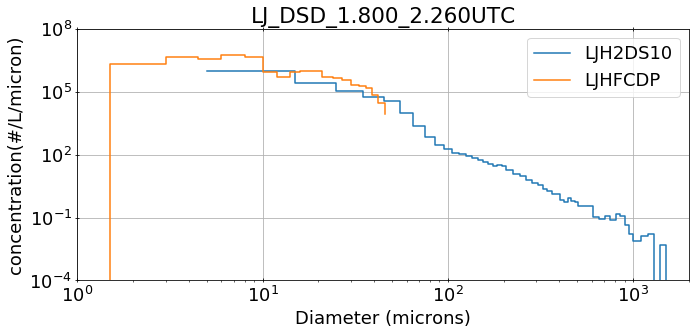

In [141]:
fig, ax1 = plt.subplots(figsize=(10,5))

plt.step(x,f.iloc[:,113:173].sum(), label='LJH2DS10',where='post')
plt.step(y,f.iloc[:,34:54].sum(), label='LJHFCDP',where='post')
ax1.tick_params(axis='both',direction='inout',top=True)

plt.xlabel('Diameter (microns)')
plt.ylabel('concentration(#/L/micron)')
plt.xscale('log')
plt.yscale('log')
plt.title('LJ_DSD_1.800_2.260UTC')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.xlim(1,2000)
plt.ylim(10**-4,10**8)

plt.rcParams.update({'font.size': 18})


plt.show()

In [129]:
f.iloc[:,34:56]

,cbin01_x,cbin02_x,cbin03_x,cbin04_x,cbin05_x,cbin06_x,cbin07_x,cbin08_x,cbin09_x,cbin10_x,...,cbin13_x,cbin14_x,cbin15_x,cbin16_x,cbin17_x,cbin18_x,cbin19_x,cbin20_x,cbin21_x,nbin01_x
0,0.0,63.45,0.00,63.45,238.0,999.4,1380.0,1904.00,3236.0,5758.00,...,2855.00,2475.0,4283.0,7900.0,8344.0,2126.0,428.3,119.0,20.94,0
1,0.0,68.43,205.30,68.43,1283.0,2874.0,2258.0,1848.00,3387.0,4414.00,...,4037.00,4927.0,6432.0,11050.0,12620.0,2908.0,1026.0,384.9,28.74,0
2,0.0,0.00,73.67,73.67,1823.0,5470.0,3923.0,2486.00,3536.0,4531.00,...,3573.00,4567.0,6593.0,11600.0,8803.0,2284.0,884.0,276.3,33.15,0
3,0.0,0.00,201.20,134.20,1761.0,4226.0,3622.0,2717.00,2515.0,2968.00,...,3454.00,4461.0,7311.0,10400.0,7982.0,1778.0,830.1,452.8,18.11,0
4,0.0,64.23,449.60,64.23,1252.0,2890.0,1927.0,1686.00,2264.0,3083.00,...,2955.00,3211.0,4849.0,8350.0,6744.0,1349.0,626.2,120.4,34.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.0,37390.00,170100.00,140300.00,215500.0,61770.0,2359.0,961.10,0.0,87.37,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
186,0.0,16290.00,11410.00,9665.00,17470.0,5523.0,276.1,69.04,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
187,0.0,36280.00,163400.00,109900.00,143800.0,74630.0,3381.0,483.00,483.0,80.51,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
188,0.0,49690.00,93460.00,86560.00,143000.0,36620.0,1455.0,323.40,161.7,80.84,...,53.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0


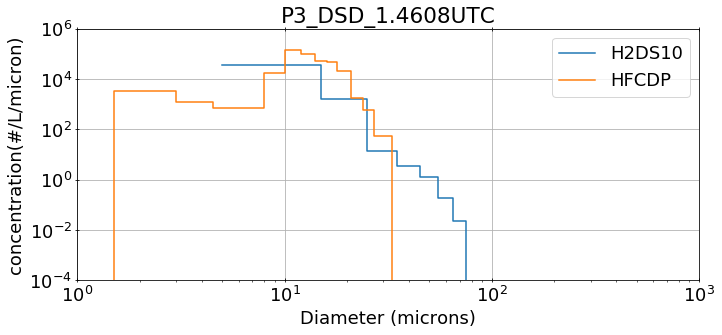

In [592]:
fig, ax1 = plt.subplots(figsize=(10,5))
plt.step(x,f.iloc[:,113:173], label='2DS10',where='post')
plt.step(y,f.iloc[0,34:54], label='FCDP',where='post')
ax1.tick_params(axis='both',direction='inout',top=True)

plt.xlabel('Diameter (microns)')
plt.ylabel('concentration(#/L/micron)')
plt.xscale('log')
plt.yscale('log')
plt.title('P3_DSD_1.4608UTC')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.xlim(1,10**3)
plt.ylim(10**-4,10**6)

plt.rcParams.update({'font.size': 18})


plt.show()

In [136]:
f=f[(f.effectiveDiam>0)]

In [137]:
f

,Time_Start,TAS_x,Palt_x,Hdg_x,Temp_x,Dew_x,NevLWC_x,FSSPWC_x,FCDPHWC_x,FCDPWC_x,...,nbin54,nbin55,nbin56,nbin57,nbin58,nbin59,nbin60,nbin61,totaln,Re_y
0,1.800278,132,14999,78,1.8,2.2,0.1,0.0,2.1,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110000.0,21.739042
1,1.800556,133,14979,79,2.2,1.7,1.5,1.0,3.1,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120000.0,24.721863
2,1.800833,134,14971,79,2.6,1.6,1.5,1.3,2.7,1.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110000.0,25.563458
3,1.801111,134,14964,80,2.7,2.5,1.5,1.2,2.6,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,26.741685
4,1.801389,134,14953,79,2.7,3.3,1.5,1.1,2.0,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41000.0,43.547317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2.257500,113,1358,38,25.0,25.1,0.0,0.1,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,8.458908
186,2.257778,113,1344,38,25.0,24.8,0.0,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,8.742312
187,2.258333,115,1307,38,25.1,25.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,9.112893
188,2.258611,115,1286,38,25.1,24.8,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,9.257824


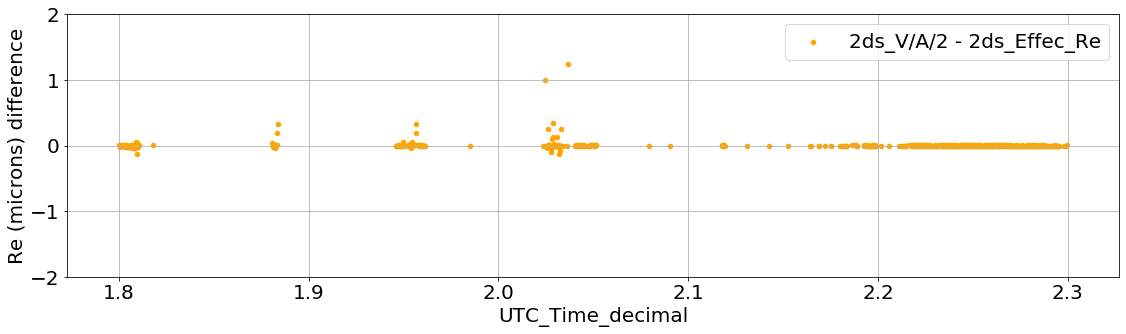

In [124]:
#plt.xlim(18.75,18.9)
plt.figure(figsize=(16,5))
cm = plt.cm.get_cmap('jet')
#cm = plt.cm.get_cmap('jet')
#xy = range(20)
#z = xy
#plt.scatter(d['Time_Start'].values, d['Re1'].values, label='2ds_cbin_Re',s=20,color='red')
plt.scatter(d['Time_Start'].values, ((d['Re5'].values)/2) *1.5-d.effectiveDiam/2, label='2ds_V/A/2 - 2ds_Effec_Re',s=20,color='orange')
#plt.scatter(d['Time_Start'].values, d.effectiveDiam/2, label='2ds_Effec_Re',s=20,color='blue')
#plt.scatter(d['Time_Start'].values, d['Re3'].values, label='fcdp_cbin_Re',s=20,color='green')
#cb = plt.colorbar()
#plt.clim(0, 7000)
#plt.scatter(gpstime_res,bo_re_res,label='Pol-',s=12)
#plt.plot(glat_21[cond],bi_re21[cond])
#plt.plot(glat_21[cond],bo_re[cond])
plt.legend(loc=0)
plt.grid(True)
#plt.xlim(3.25,3.3)
plt.ylim(-2,2)
plt.xlabel('UTC_Time_decimal')
plt.ylabel('Re (microns) difference')
plt.rcParams.update({'font.size': 20})

plt.tight_layout(True)

plt.show()

#cmap = plt.get_cmap('jet', 20)
#cmap.set_under('white')

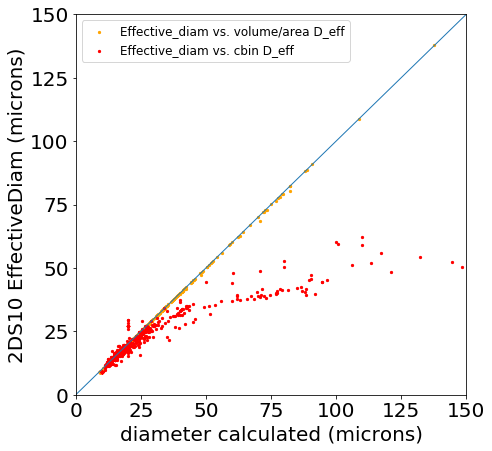

In [153]:
plt.figure(figsize=(7,7))
plt.scatter(((d['Re5'].values)) *1.5, d.effectiveDiam, label='Effective_diam vs. volume/area D_eff',s=5,color='orange')
plt.scatter(d['Re2'].values, d.effectiveDiam, label='Effective_diam vs. cbin D_eff',s=5,color='red')
plt.plot(np.arange(0,150,0.01),np.arange(0,150,0.01),linewidth=1)
plt.xlabel('diameter calculated (microns)')
plt.ylabel('2DS10 EffectiveDiam (microns)')
plt.xlim(0,150)
plt.xticks(np.arange(0, 151, 25))
plt.ylim(0,150)
plt.yticks(np.arange(0, 151, 25))
plt.legend(loc=0,fontsize=12)
plt.show()

In [444]:
f

,Time_Start,Time_Stop_x,Day_Of_Year_x,Latitude_x,Longitude_x,Pressure_Altitude_x,Static_Air_Temp_x,Static_Pressure_x,Solar_Zenith_Angle_x,height_x,...,nbin54,nbin55,nbin56,nbin57,nbin58,nbin59,nbin60,nbin61,totaln,Re_y
1,3.265000,98155,251,18.667836,123.647457,1853.0,25.03,947.21,14.9,564.939024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,648.0,6.001130
2,3.265278,98156,251,18.668936,123.648187,1860.0,24.22,946.97,14.9,567.073171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2718.0,5.678940
3,3.265556,98157,251,18.670035,123.648917,1863.0,24.43,946.87,14.9,567.987805,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,582.0,5.734450
4,3.266111,98159,251,18.672236,123.650379,1852.0,25.15,947.25,14.9,564.634146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1550.0,5.453337
5,3.266389,98160,251,18.673335,123.651111,1837.0,24.89,947.77,14.9,560.060976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2748.0,5.591029
6,3.266667,98161,251,18.674436,123.651845,1839.0,24.42,947.70,14.9,560.670732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2841.0,5.802920
7,3.266944,98162,251,18.675537,123.652579,1832.0,24.29,947.94,14.9,558.536585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2703.0,5.763486
8,3.267500,98164,251,18.677740,123.654047,1821.0,24.56,948.32,14.9,555.182927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241.0,6.084321
9,3.268889,98169,251,18.683256,123.657724,1796.0,25.06,949.19,14.9,547.560976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,8.911167
10,3.275278,98192,251,18.708794,123.674623,1704.0,25.41,952.39,14.8,519.512195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,12.003541


In [299]:
f.iloc[:,15:35].sum()

cbin01_x         0.00
cbin02_x     31712.00
cbin03_x     80850.00
cbin04_x     45014.60
cbin05_x     75894.00
cbin06_x    171161.00
cbin07_x    149384.00
cbin08_x    122448.00
cbin09_x     75552.30
cbin10_x     11943.60
cbin11_x      2523.48
cbin12_x       377.11
cbin13_x       101.52
cbin14_x         0.00
cbin15_x         0.00
cbin16_x         0.00
cbin17_x         0.00
cbin18_x         0.00
cbin19_x         0.00
cbin20_x         0.00
dtype: float64

In [301]:
y

array([ 0. ,  1.5,  3. ,  4.5,  6. ,  8. , 10. , 12. , 14. , 16. , 18. ,
       21. , 24. , 27. , 30. , 33. , 36. , 39. , 42. , 46. ])